In [1]:
from mlwpy import *


In [2]:
%matplotlib inline

In [3]:
def axis_helper(ax, lims):
    'clean up axes'
    ax.set_xlim(lims); ax.set_xticks([])
    ax.set_ylim(lims); ax.set_yticks([])
    ax.set_aspect('equal')

In [4]:
D = np.array([[3,5],[4,2]])

In [5]:
x, y = D[:,0], D[:,1]

In [6]:
x

array([3, 4])

In [7]:
y

array([5, 2])

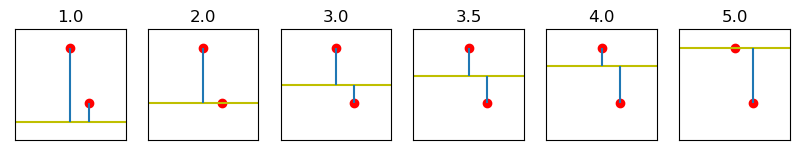

In [8]:
horizontal_lines = np.array([1, 2, 3, 3.5, 4, 5])

results = []
fig, axes = plt.subplots(1,6,figsize=(10,5))
for h_line, ax in zip(horizontal_lines, axes.flat):
    # styling
    axis_helper(ax, (0,6))
    ax.set_title(str(h_line))
    
    # plot the data
    ax.plot(x,y, 'ro')
    
    # plot the prediction line
    ax.axhline(h_line, color='y') # ax coords; defaults to 100%    

    # plot the errors
    # the horizontal line *is* our prediction; renaming for clarity
    predictions = h_line 
    ax.vlines(x, predictions, y)
    
    # calculate the error amounts and their sum-of-squares
    errors = y - predictions
    sse = np.dot(errors, errors)

    
    # put together some results in a tuple
    results.append((predictions, 
                    errors, errors.sum(), 
                    sse, np.sqrt(sse)))

In [9]:
col_labels = "Prediction", "Errors", "Sum", "SSE", "Distance"
display(pd.DataFrame.from_records(results, 
                                  columns=col_labels, 
                                  index="Prediction"))

/Users/markkim/Desktop/CSC412/notebooks/Week4/mlwpy.py:55: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return "{\centering\n%s\n\medskip}" % self.to_latex()


,Errors,Sum,SSE,Distance
Prediction,,,,
1.0000,"[4.0, 1.0]",5.0000,17.0000,4.1231
2.0000,"[3.0, 0.0]",3.0000,9.0000,3.0000
3.0000,"[2.0, -1.0]",1.0000,5.0000,2.2361
3.5000,"[1.5, -1.5]",0.0000,4.5000,2.1213
4.0000,"[1.0, -2.0]",-1.0000,5.0000,2.2361
5.0000,"[0.0, -3.0]",-3.0000,9.0000,3.0000


# with tilted lines

In [10]:
def process(D, model, ax):
    # make some useful abbreviations/names
    # y is our "actual"
    x, y = D[:,0], D[:,1] 
    m, b = model
    
    # styling
    axis_helper(ax, (0,8))

    # plot the data
    ax.plot(x,y,'ro')

    # plot the prediction line
    helper_xs = np.array([0,8])
    helper_line = m * helper_xs + b
    ax.plot(helper_xs, helper_line, color='y')
    
    # plot the errors
    predictions = m * x + b
    ax.vlines(x, predictions, y)
    
    # calculate error amounts
    errors = y - predictions
    
    # tuple up the results
    sse = np.dot(errors, errors)
    return (errors, errors.sum(), sse, np.sqrt(sse))
     

# with several different prediction lines used

/Users/markkim/Desktop/CSC412/notebooks/Week4/mlwpy.py:55: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return "{\centering\n%s\n\medskip}" % self.to_latex()


,Raw Errors,Sum,SSE,TotDist
0,"[2, -2]",0,8,2.8284
1,"[1, -3]",-2,10,3.1623
2,"[0, -4]",-4,16,4.0000
3,"[0, -2]",-2,4,2.0000
4,"[0, 0]",0,0,0.0000


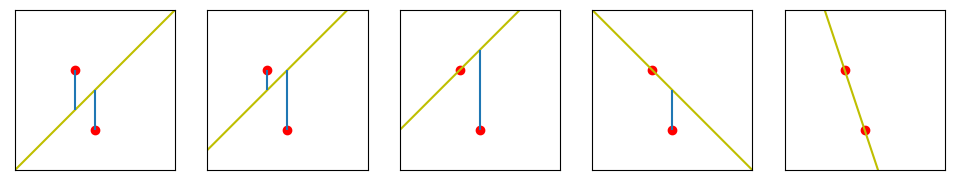

In [11]:
# our data is very simple:  two (x,y) points
D = np.array([[3,5],
              [4,2]])

#                      m   b  --> predictions = mx + b
lines_mb = np.array([[ 1,  0],
                     [ 1,  1],
                     [ 1,  2],
                     [-1,  8],
                     [-3, 14]])

col_labels = ("Raw Errors", "Sum", "SSE", "TotDist")
results = []

# note: plotting occurs in process()
fig, axes = plt.subplots(1,5,figsize=(12,6))
records = [process(D, mod, ax) for mod,ax in zip(lines_mb, axes.flat)]
df = pd.DataFrame.from_records(records, columns=col_labels)
display(df)

# 4.3.3 Performing Linear Regression on Diabettes Data set

In [12]:
diabetes = datasets.load_diabetes()
tts = skms.train_test_split(diabetes.data, diabetes.target, test_size=.25)
(diabetes_train_ftrs, diabetes_test_ftrs,
diabetes_train_tgt, diabetes_test_tgt) = tts

diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head()

/Users/markkim/Desktop/CSC412/notebooks/Week4/mlwpy.py:55: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return "{\centering\n%s\n\medskip}" % self.to_latex()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0000
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0000
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0000
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0000
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0000


In [13]:
lr = linear_model.LinearRegression()
fit = lr.fit(diabetes_train_ftrs, diabetes_train_tgt)
preds = fit.predict(diabetes_test_ftrs)

In [14]:
metrics.mean_squared_error(diabetes_test_tgt, preds)
# outputs average distance of error

2848.3106508475057

# Optimization techniques

In [16]:
# our data points
tgt = np.array([3,5,8,12,15])
tgt.mean()

8.6

In [ ]:
#Random Guess
num_guesses = 10
results = []

for g in range(num_guesses):
    guess = np.random.uniform(low=tgt.min(), high=tgt.max())
    total_distance = np.sum( (tgt - guess)**2)
    results.append( (total_distance, guess))
best_guess = sorted(results)[0][1]
best_guess

In [17]:
# Random Step
num_steps = 100
step_size = .05

best_guess = np.random.uniform(low=tgt.min(), high=tgt.max())
best_dist = np.sum( (tgt - best_guess)**2 )

for s in range(num_steps):
    new_guess = best_guess + (np.random.choice([+1,-1]) * step_size)
    new_dist = np.sum(  (tgt - new_guess)**2 )
    if new_dist < best_dist:
        best_guess, best_dist = new_guess, new_dist
print(best_guess)

8.585335942001969


In [ ]:
new_guess

In [ ]:
new_dist

In [ ]:
new_guess

In [22]:
num_steps = 1000
step_size = .02

best_guess = np.random.uniform(low=tgt.min(), high=tgt.max())
best_dist = np.sum( (tgt - best_guess)**2 )
print("start:", best_guess)

start: 11.314684304303272


In [23]:
for s in range(num_steps):
    guesses = best_guess + (np.array([-1,1]) * step_size)
    dists = np.sum( (tgt[:,np.newaxis] - guesses)**2, axis=0)
    
    better_idx = np.argmin(dists)  # return the index number of the minimum distance
    
    if dists[better_idx] > best_dist:
        break
    
    best_guess = guesses[better_idx]
    best_dist = dists[better_idx]
print(" end:", best_guess)

 end: 8.59468430430333


In [ ]:
dists